CREDIT EDA ASSIGNMENT


Business Objectives


This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

 

1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

 

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [2]:
# Reading the csv file using pandas
# Display the top 5 rows of the dataframe

previous_application_df=pd.read_csv("C:\\Users\\pavpr\\OneDrive\\Desktop\\Credit EDA Assignment\\previous_application.csv")

previous_application_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [3]:
previous_application_df.shape

(1670214, 37)

In [4]:
# Reading the csv file using pandas

application_df=pd.read_csv("C:\\Users\\pavpr\\OneDrive\\Desktop\\Credit EDA Assignment\\application_data.csv")

In [5]:
# Display the top 5 rows of the dataframe

application_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [6]:
# seperating the data where the Target column is "1"

application_df1=application_df[application_df["TARGET"]==1]

In [7]:
application_df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied               Working   
26         702000.0   Unaccompanied               Working   
40         855000.0   Unaccompanied  Commercial associate   
42         238500.0   Unaccompanied               Working   
81         252000.0   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801       -9461           -637            -3648.0   
26                    0.018029      -18724          -2628            -6573.0   
40                    0.025164      -17482          -1262            -1182.0   
42                    0.007305      -13384          -3597              -45.0   
81                    0.028663      -24794         365243            -5391.0   

    DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             -2120          NaN           1               1                0   
26            -1827          NaN           1               1                0   
40            -1029          NaN           1               1                0   
42            -4409          NaN           1               1                1   
81            -4199          NaN           1               0                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                  1           1           0        Laborers              1.0   
26                 1           0           0   Cooking staff              1.0   
40                 1           0           0        Laborers              2.0   
42                 1           1           0     Sales staff              2.0   
81                 1           0           0             NaN              2.0   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
26                     3                            2   
40                     2                            2   
42                     3                            3   
81                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
81                   THURSDAY                       10   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
2

In [8]:
# to display the dimensions of the dataframe

application_df1.shape

(24825, 122)

In [9]:
# seperating the data where the Target column is "0"

application_df2=application_df[application_df["TARGET"]==0]

In [10]:
application_df2.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   
5             -477          NaN           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   
5                 1           1           0        Laborers              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   
5                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                  

In [11]:
# to display the dimensions of the dataframe

application_df2.shape

(282686, 122)

In [12]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [13]:
# to display the dimensions of the dataframe

application_df.shape

(307511, 122)

In [14]:
# to check data type

application_df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [15]:
# display of the column names of the datframe

application_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [16]:
application_df.index

RangeIndex(start=0, stop=307511, step=1)

In [17]:
# dealing with missing data
# to check for NaN values
# True for NaN values
# NaN not a number


application_df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [18]:
# percentage of missing data

100*application_df.isnull().mean()

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [19]:
# as the dataset is having missing values in majority of the columns, i am taking a cutoff of 45% and dropping those columns


cut_off = 45
cols_to_drop=list(application_df.columns[100*application_df.isnull().mean()>cut_off])
print(cols_to_drop)
print("no of columns dropped:",len(cols_to_drop))

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE

In [20]:
application_df=application_df.drop(cols_to_drop,axis=1)

In [21]:
application_df.shape

(307511, 73)

In [22]:
# To view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

application_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  \
count      307511.000000    307511.000000  307511.000000   307511.000000   
mean        -4986.120328     -2994.202373       0.999997        0.819889   
std          3522.886321      1509.450419       0.001803        0.384280   
min        -24672.000000     -7197.000000       0.000000        0.000000   
25%         -7479.500000     -4299.000000       1.000000        1.000000   
50%         -4504.000000     -3254.000000       1.000000        1.000000   
75%         -2010.000000     -1720.000000       1.000000        1.000000   
max             0.000000         0.000000       1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    307511.000000     307511.000000  307511.000000  307511.000000   
mean          0.199368          0.998133       0.281066       0.056720   
std           0.399526          0.043164       0.449521       0.231307   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307509.000000         307511.000000                307511.000000   
mean          2.152665              2.052463                     2.031521   
std           0.910682              0.509034                     0.502737   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.26583

In [23]:
# Check the value_counts of all the columns

for i in application_df.columns:
    print(application_df[i].value_counts())
    print('*'*60)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



AMT_ANNUITY
9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
11250.0     1459
26217.0     1453
20250.0     1345
12375.0     1339
31653.0     1269
26640.0     1236
22500.0     1234
16875.0     1213
36459.0     1191
33025.5      938
26446.5      916
22018.5      904
23773.5      875
25537.5      836
26316.0      829
31261.5      822
21906.0      800
7875.0       741
40320.0      703
21888.0      688
32602.5      687
15750.0      684
27000.0      681
19867.5      653
33750.0      652
21775.5      643
29970.0      643
30528.0      626
45000.0      570
14350.5      564
32895.0      564
14751.0      551
23494.5      540
42790.5      527
26086.5      507
29250.0      506
23931.0      501
31630.5      499
31522.5      495
24939.0      491
16456.5      490
19125.0      471
21109.5      466
13963.5      462
30078.0      450
28408.5      449
45333.0      441
46084.5      436
67500.0      431
16011.0      419
35937.0      418
24543.0      418
25321.5      417
24

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [24]:
# value counts for Target 

application_df["TARGET"].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [25]:
# value counts for contract type

application_df["NAME_CONTRACT_TYPE"].value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

In [26]:
# value counts for gender

application_df["CODE_GENDER"].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [27]:
application_df['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [28]:
application_df['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

In [29]:
application_df['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

In [30]:
application_df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [31]:
application_df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [32]:
application_df['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [33]:
application_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [34]:
# Creating a new column with "Size_Bucket"

application_df['Size_Bucket'] = pd.qcut(application_df.AMT_INCOME_TOTAL, [0,0.2,0.4,0.6,0.8,1], ["S","M","L","XL","XXL"])

In [35]:
application_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [36]:
# to check the unique values 

application_df.nunique()

SK_ID_CURR                     307511
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
AMT_GOODS_PRICE                  1002
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL  

In [37]:
# seperating the numerical columns from the given dataset

num_cols=application_df.describe().columns
num_cols

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

In [38]:
# seperating the categorical columns from the given dataset

cat_col = list(set(application_df.columns) - set(application_df.describe().columns)) 
cat_col

['NAME_CONTRACT_TYPE',
 'Size_Bucket',
 'CODE_GENDER',
 'NAME_INCOME_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_FAMILY_STATUS',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'ORGANIZATION_TYPE',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE',
 'NAME_TYPE_SUITE']

In [39]:
# percentage of missing values

100*application_df[num_cols].isnull().mean()

SK_ID_CURR                      0.000000
TARGET                          0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE                0.000000
FLAG_PHONE                      0.000000
FLAG_EMAIL                      0.000000
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_

In [40]:
for i in num_cols:# iterating through each numerical column
    if application_df[i].isnull().mean()>0:# checking whether missing values are present or not
        med=application_df[i].median()# if present calculating median of that column
        application_df[i]=application_df[i].fillna(med)# finally replacing missing values with median

In [41]:
100*application_df[num_cols].isnull().mean()

SK_ID_CURR                     0.0
TARGET                         0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CITY         0.0
LIVE_CITY_NOT_WORK_CITY        0.0
EXT_SOURCE_2        

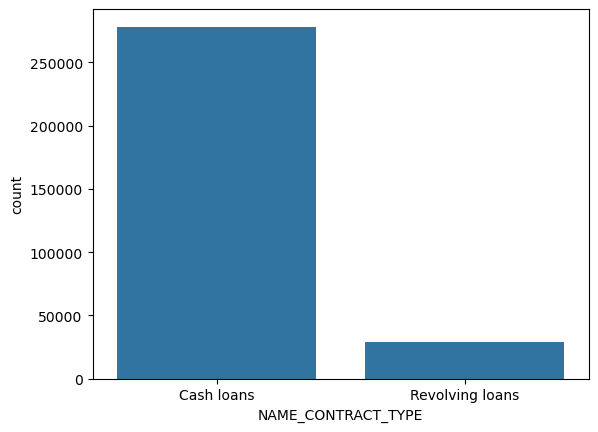

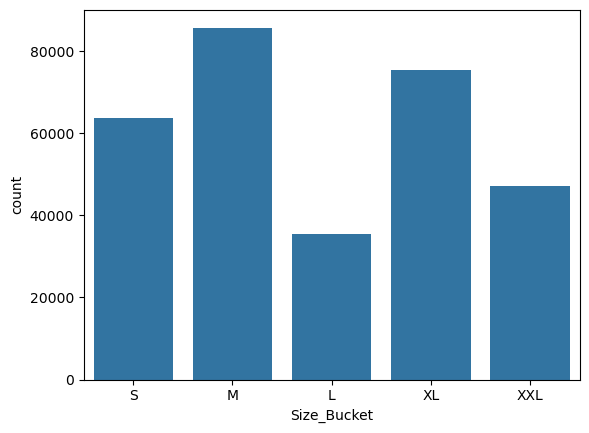

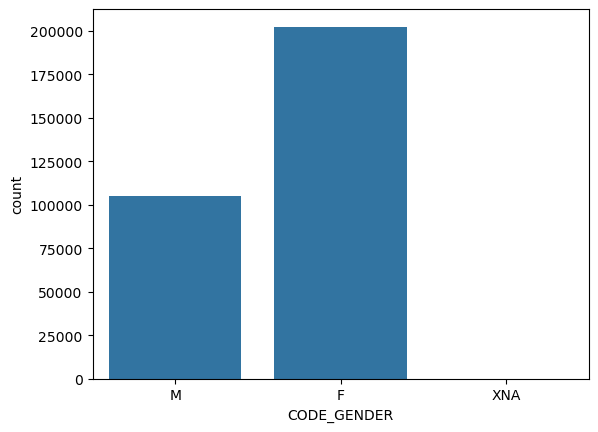

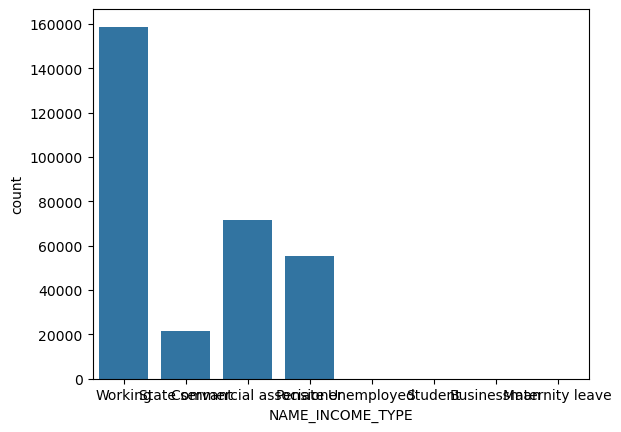

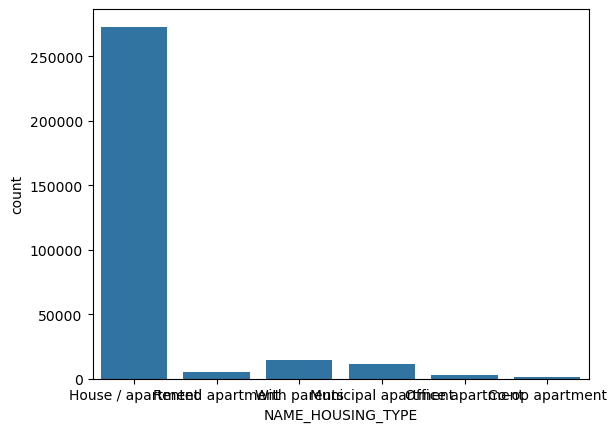

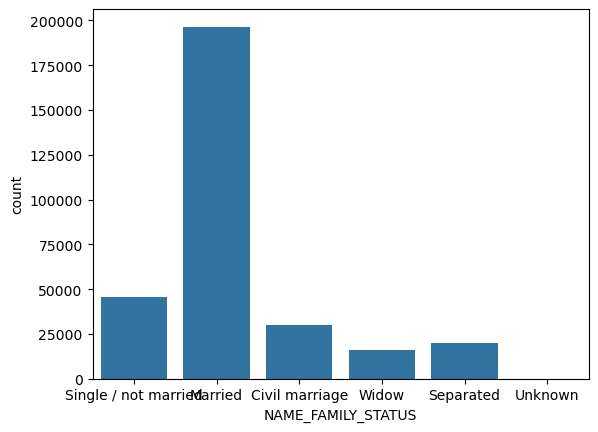

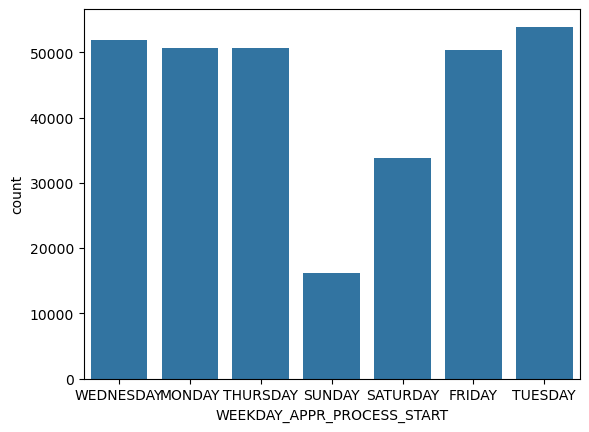

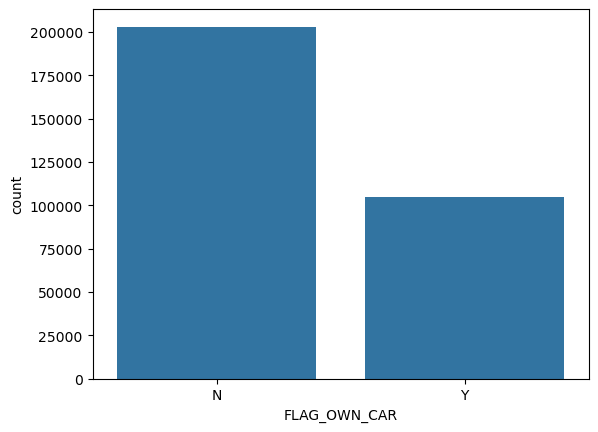

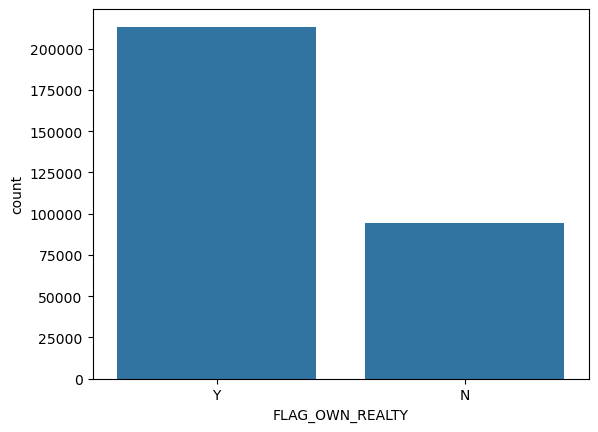

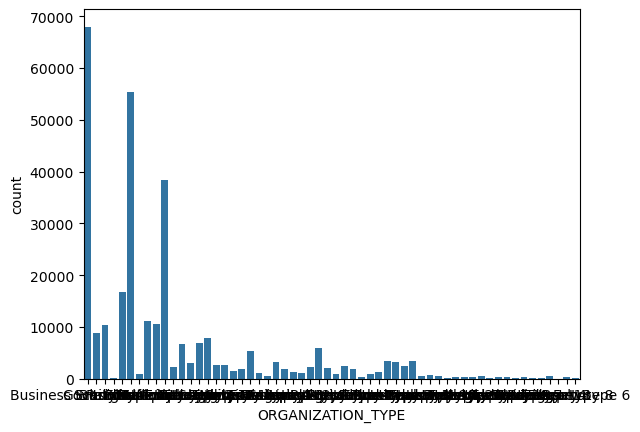

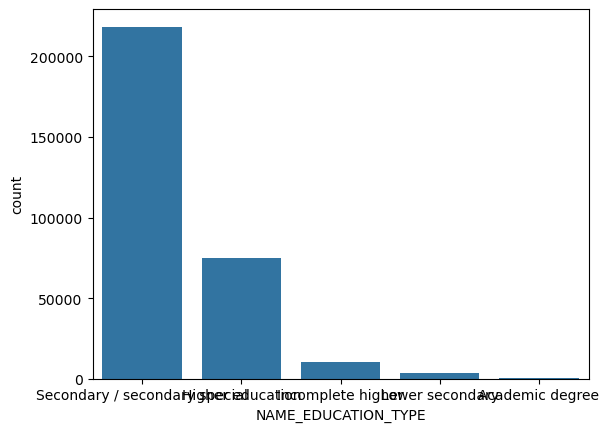

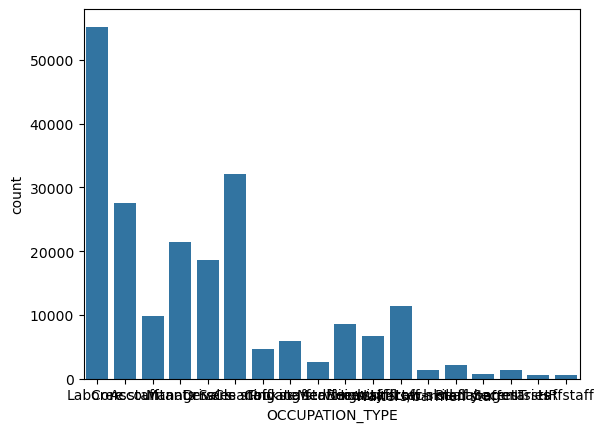

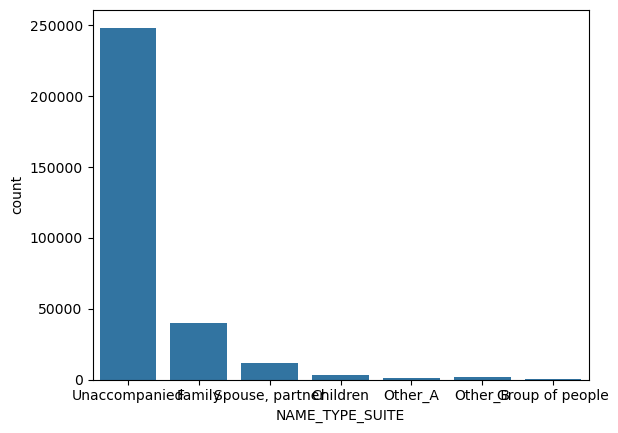

In [42]:
for col in cat_col:
    sns.countplot(x=application_df[col])
    plt.show()

<Axes: ylabel='NAME_INCOME_TYPE'>

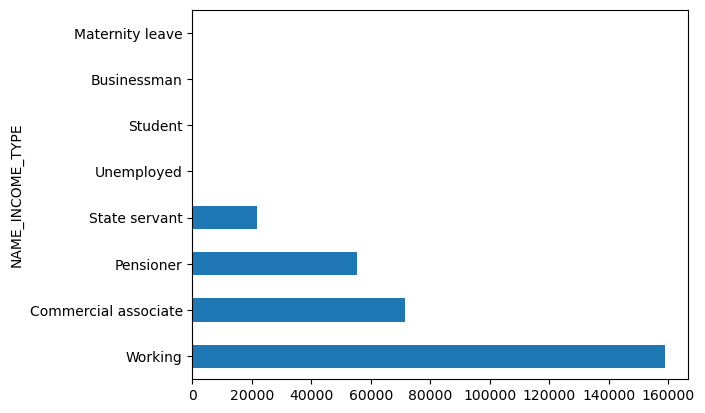

In [43]:
application_df["NAME_INCOME_TYPE"].value_counts().plot.barh()

# cash loans are high in the given dataset
# Amount income(size bucket) people with M,L,S are more in the dataset
# females are more in terms of taking the loan
# working group is high in the data set
# Secondary / secondary special group is high
# married group is also high in the given dataset
# labourers are more in number
# House / apartment are high 

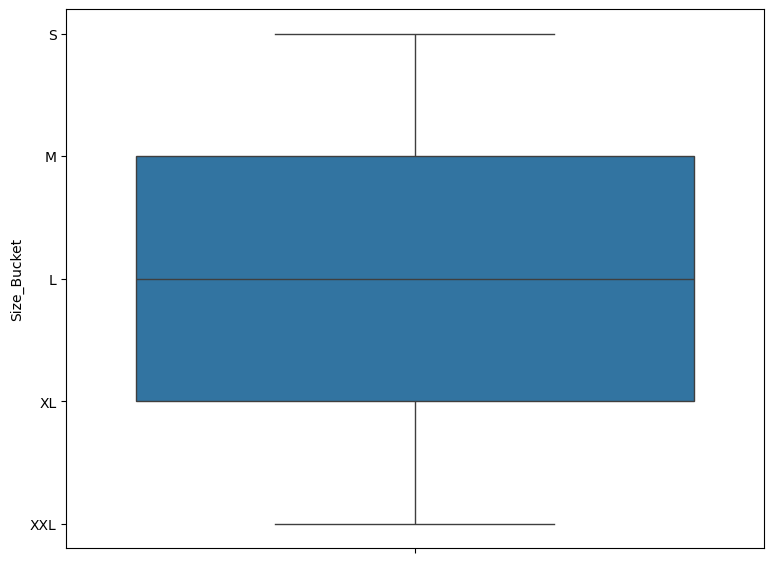

In [44]:
plt.figure(figsize=[9,7])
sns.boxplot(application_df.Size_Bucket)
plt.show()

# majority of the income group falls in between 1st and 3rd quadrant

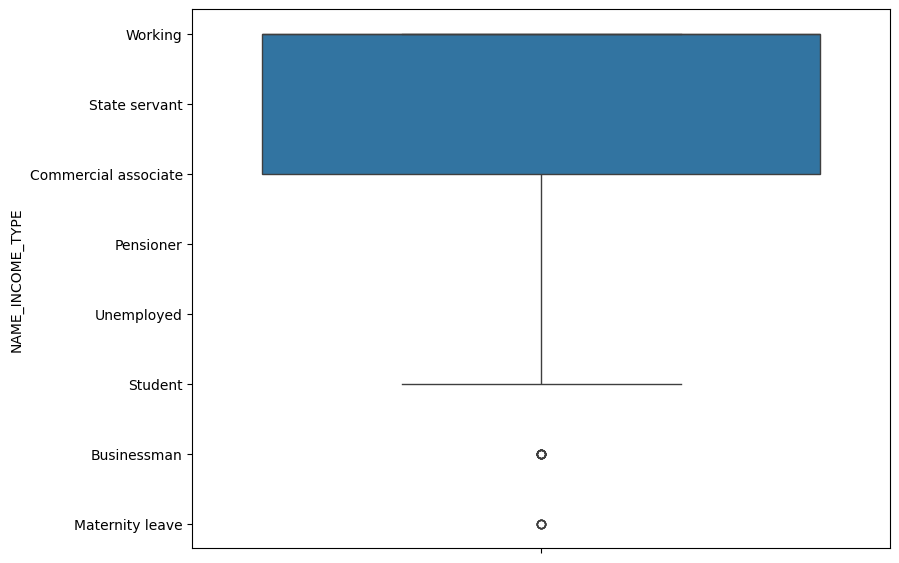

In [45]:
plt.figure(figsize=[9,7])
sns.boxplot(application_df.NAME_INCOME_TYPE)
plt.show()

# income type is falling under the 1st quadrant 

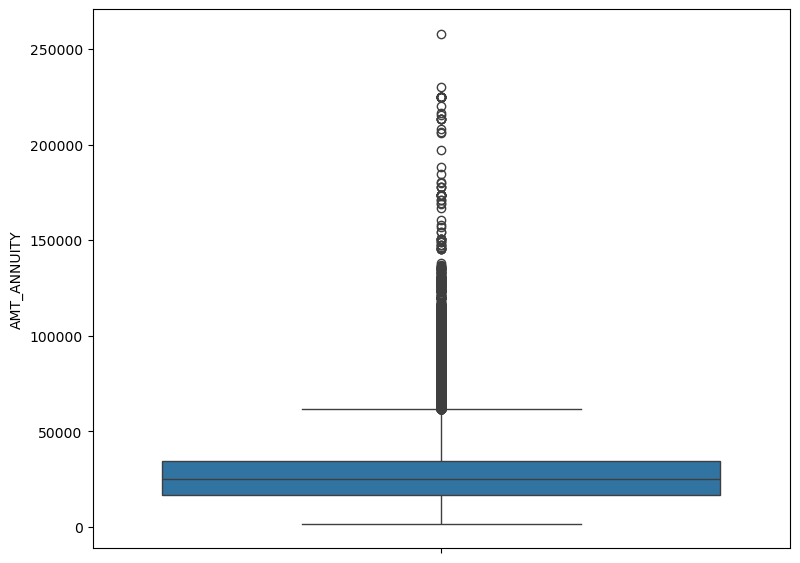

In [46]:
plt.figure(figsize=[9,7])
sns.boxplot(application_df.AMT_ANNUITY)
plt.show()

# outliers are present in the given annuity column however 1st and 3d quartile is falling less than 40000

Bounds of the column:  -10584.0 61704.0


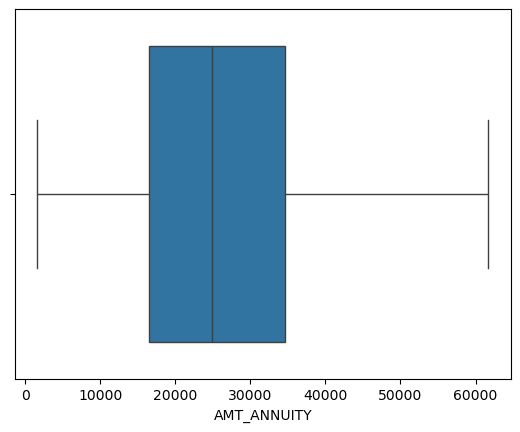

In [47]:
# Handle outliers in AMT_ANNUITY

q1=application_df["AMT_ANNUITY"].describe()["25%"]# 25th Percentile
q3=application_df["AMT_ANNUITY"].describe()["75%"]# 75th Percentile
iqr=q3-q1
upper_bound=q3+1.5*iqr
lower_bound=q1-1.5*iqr
print("Bounds of the column: ",lower_bound,upper_bound)

application_df["AMT_ANNUITY"]=np.where(application_df["AMT_ANNUITY"]>upper_bound,upper_bound,application_df["AMT_ANNUITY"])
application_df["AMT_ANNUITY"]=np.where(application_df["AMT_ANNUITY"]<lower_bound,lower_bound,application_df["AMT_ANNUITY"])

sns.boxplot(x=application_df["AMT_ANNUITY"])
plt.show()

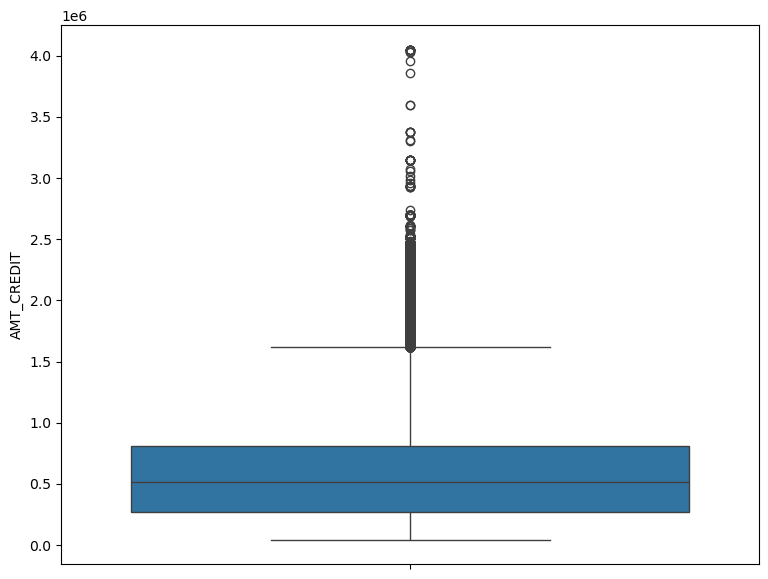

In [48]:
plt.figure(figsize=[9,7])
sns.boxplot(application_df.AMT_CREDIT)
plt.show()

Bounds of the column:  -537975.0 1616625.0


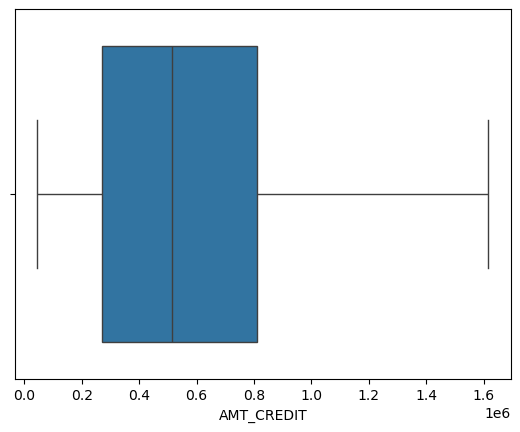

In [49]:
# Handle outliers in AMT_CREDIT

q1=application_df["AMT_CREDIT"].describe()["25%"]# 25th Percentile
q3=application_df["AMT_CREDIT"].describe()["75%"]# 75th Percentile
iqr=q3-q1
upper_bound=q3+1.5*iqr
lower_bound=q1-1.5*iqr
print("Bounds of the column: ",lower_bound,upper_bound)

application_df["AMT_CREDIT"]=np.where(application_df["AMT_CREDIT"]>upper_bound,upper_bound,application_df["AMT_CREDIT"])
application_df["AMT_CREDIT"]=np.where(application_df["AMT_CREDIT"]<lower_bound,lower_bound,application_df["AMT_CREDIT"])

sns.boxplot(x=application_df["AMT_CREDIT"])
plt.show()

# outliers are present in the given credit column however majority was falling under 1st quartile

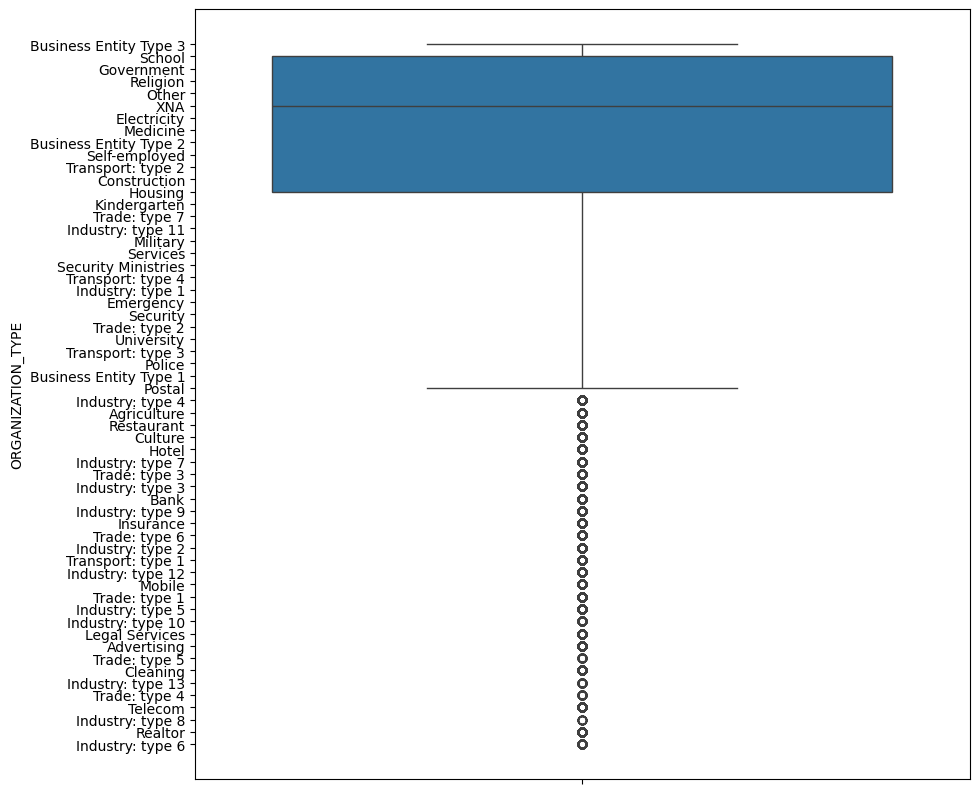

In [50]:
plt.figure(figsize=[10,10])
sns.boxplot(application_df.ORGANIZATION_TYPE)
plt.show()

# ORGANIZATION_TYPE also has lot of outliers however most of the type lies in 1st quartile

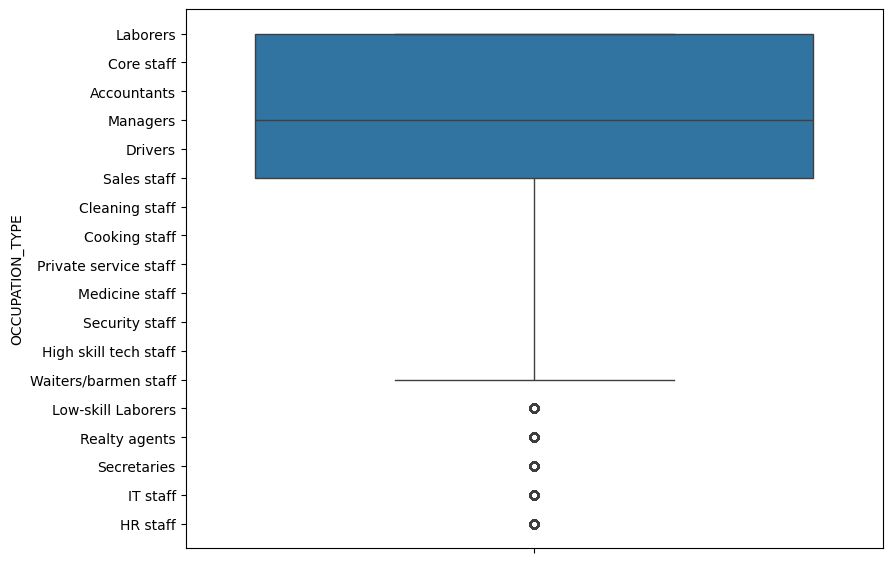

In [51]:
plt.figure(figsize=[9,7])
sns.boxplot(application_df.OCCUPATION_TYPE)
plt.show()

In [52]:
# checking the dateset with Tagert columns as 1 and summing
new_target=(application_df['TARGET'] == 1).sum()

In [53]:
# checking the dateset with Tagert columns as 0 and summing
new_target1=(application_df['TARGET'] == 0).sum()

In [54]:
# trying to check the dataset imbalancing

ratio = (application_df['TARGET']==0).sum() / (application_df['TARGET']==1).sum()
ratio

11.387150050352467

there is a data imbalance in this dataset with an 11.38%

In [55]:
corr1=application_df.select_dtypes(include=["int64","float64"]).corr()
corr1

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                     1.000000 -0.002108     -0.001129   
TARGET                        -0.002108  1.000000      0.019187   
CNT_CHILDREN                  -0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL              -0.001820 -0.003982      0.012882   
AMT_CREDIT                    -0.000629 -0.029467      0.002248   
AMT_ANNUITY                    0.000218 -0.009595      0.022604   
AMT_GOODS_PRICE               -0.000258 -0.039623     -0.001856   
REGION_POPULATION_RELATIVE     0.000849 -0.037227     -0.025573   
DAYS_BIRTH                    -0.001500  0.078239      0.330938   
DAYS_EMPLOYED                  0.001366 -0.044932     -0.239818   
DAYS_REGISTRATION             -0.000973  0.041975      0.183395   
DAYS_ID_PUBLISH               -0.000384  0.051457     -0.028019   
FLAG_MOBIL                     0.002804  0.000534      0.001041   
FLAG_EMP_PHONE                -0.001337  0.045982      0.240714   
FLAG_WORK_PHONE               -0.000415  0.028524      0.055630   
FLAG_CONT_MOBILE               0.002815  0.000370     -0.000794   
FLAG_PHONE                     0.002753 -0.023806     -0.029906   
FLAG_EMAIL                     0.000281 -0.001758      0.022619   
CNT_FAM_MEMBERS               -0.002895  0.009308      0.879160   
REGION_RATING_CLIENT          -0.001075  0.058899      0.025423   
REGION_RATING_CLIENT_W_CITY   -0.001138  0.060893      0.024781   
HOUR_APPR_PROCESS_START        0.000350 -0.024166     -0.007292   
REG_REGION_NOT_LIVE_REGION    -0.000283  0.005576     -0.013319   
REG_REGION_NOT_WORK_REGION     0.001097  0.006942      0.008185   
LIVE_REGION_NOT_WORK_REGION    0.002903  0.002819      0.014835   
REG_CITY_NOT_LIVE_CITY        -0.001885  0.044395      0.020072   
REG_CITY_NOT_WORK_CITY        -0.001582  0.050994      0.070650   
LIVE_CITY_NOT_WORK_CITY        0.000067  0.032518      0.069957   
EXT_SOURCE_2                   0.002319 -0.160295     -0.017990   
EXT_SOURCE_3                   0.000184 -0.155892     -0.039543   
OBS_30_CNT_SOCIAL_CIRCLE      -0.001413  0.009447      0.015662   
DEF_30_CNT_SOCIAL_CIRCLE      -0.000085  0.032394     -0.001205   
OBS_60_CNT_SOCIAL_CIRCLE      -0.001427  0.009337      0.015302   
DEF_60_CNT_SOCIAL_CIRCLE       0.001182  0.031401     -0.001811   
DAYS_LAST_PHONE_CHANGE        -0.000859  0.055218     -0.005866   
FLAG_DOCUMENT_2                0.000700  0.005417      0.001786   
FLAG_DOCUMENT_3               -0.003411  0.044346      0.056837   
FLAG_DOCUMENT_4               -0.004139 -0.002672     -0.003709   
FLAG_DOCUMENT_5               -0.001097 -0.000316     -0.016737   
FLAG_DOCUMENT_6                0.002121 -0.028602     -0.157024   
FLAG_DOCUMENT_7               -0.002694 -0.001520     -0.001498   
FLAG_DOCUMENT_8                0.001809 -0.008040      0.051697   
FLAG_DOCUMENT_9                0.001505 -0.004352     -0.001997   
FLAG_DOCUMENT_10              -0.000815 -0.001414     -0.002756   
FLAG_DOCUMENT_11              -0.002012 -0.004229     -0.005318   
FLAG_DOCUMENT_12              -0.001045 -0.000756      0.000293   
FLAG_DOCUMENT_13               0.000896 -0.011583      0.003945   
FLAG_DOCUMENT_14              -0.001077 -0.009464     -0.005459   
FLAG_DOCUMENT_15               0.002604 -0.006536      0.003609   
FLAG_DOCUMENT_16              -0.000724 -0.011615      0.010662   
FLAG_DOCUMENT_17               0.001450 -0.003378      0.000773   
FLAG_DOCUMENT_18               0.000509 -0.007952      0.004031   
FLAG_DOCUMENT_19               0.000167 -0.001358      0.000864   
FLAG_DOCUMENT_20               0.001073  0.000215      0.000988   
FLAG_DOCUMENT_21               0.000282  0.003709     -0.002450   
AMT_REQ_CREDIT_BUREAU_HOUR    -0.002517 -0.000074      0.000159   
AMT_REQ_CREDIT_BUREAU_DAY     -0.002066  0.001701      0.000107   
AMT_REQ_CREDIT_BUREAU_WEEK     0.001879 -0.001306     -0.001083   
AMT_REQ_CREDIT_BUREAU_MON      0.000328 -0.014794     -0.007983   
AMT_REQ_C

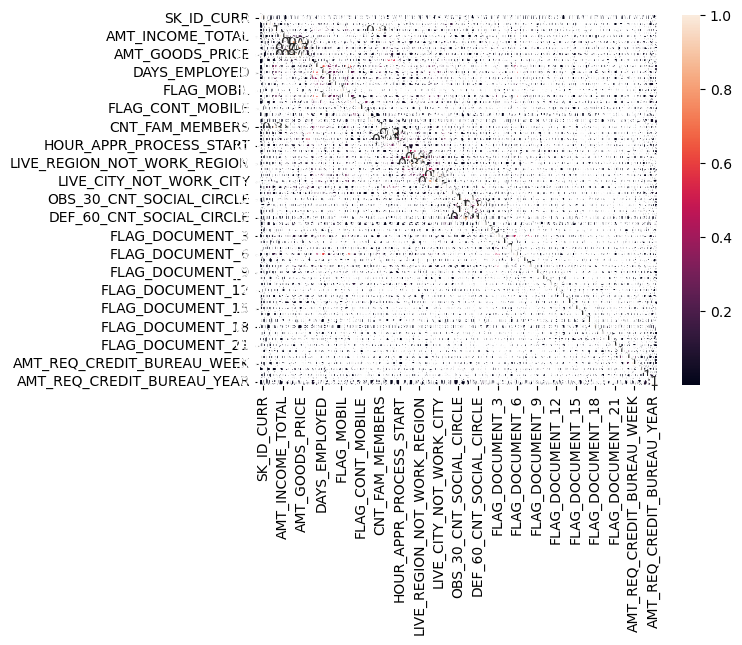

In [56]:
heatmap=sns.heatmap(application_df[num_cols].corr().abs(),annot=True)
plt.show()

In [57]:
# plt.savefig("heatmap.png")
# plt.show()

In [58]:
# Absolute Correlation

abs_corr=corr1.abs()
abs_corr

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                     1.000000  0.002108      0.001129   
TARGET                         0.002108  1.000000      0.019187   
CNT_CHILDREN                   0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL               0.001820  0.003982      0.012882   
AMT_CREDIT                     0.000629  0.029467      0.002248   
AMT_ANNUITY                    0.000218  0.009595      0.022604   
AMT_GOODS_PRICE                0.000258  0.039623      0.001856   
REGION_POPULATION_RELATIVE     0.000849  0.037227      0.025573   
DAYS_BIRTH                     0.001500  0.078239      0.330938   
DAYS_EMPLOYED                  0.001366  0.044932      0.239818   
DAYS_REGISTRATION              0.000973  0.041975      0.183395   
DAYS_ID_PUBLISH                0.000384  0.051457      0.028019   
FLAG_MOBIL                     0.002804  0.000534      0.001041   
FLAG_EMP_PHONE                 0.001337  0.045982      0.240714   
FLAG_WORK_PHONE                0.000415  0.028524      0.055630   
FLAG_CONT_MOBILE               0.002815  0.000370      0.000794   
FLAG_PHONE                     0.002753  0.023806      0.029906   
FLAG_EMAIL                     0.000281  0.001758      0.022619   
CNT_FAM_MEMBERS                0.002895  0.009308      0.879160   
REGION_RATING_CLIENT           0.001075  0.058899      0.025423   
REGION_RATING_CLIENT_W_CITY    0.001138  0.060893      0.024781   
HOUR_APPR_PROCESS_START        0.000350  0.024166      0.007292   
REG_REGION_NOT_LIVE_REGION     0.000283  0.005576      0.013319   
REG_REGION_NOT_WORK_REGION     0.001097  0.006942      0.008185   
LIVE_REGION_NOT_WORK_REGION    0.002903  0.002819      0.014835   
REG_CITY_NOT_LIVE_CITY         0.001885  0.044395      0.020072   
REG_CITY_NOT_WORK_CITY         0.001582  0.050994      0.070650   
LIVE_CITY_NOT_WORK_CITY        0.000067  0.032518      0.069957   
EXT_SOURCE_2                   0.002319  0.160295      0.017990   
EXT_SOURCE_3                   0.000184  0.155892      0.039543   
OBS_30_CNT_SOCIAL_CIRCLE       0.001413  0.009447      0.015662   
DEF_30_CNT_SOCIAL_CIRCLE       0.000085  0.032394      0.001205   
OBS_60_CNT_SOCIAL_CIRCLE       0.001427  0.009337      0.015302   
DEF_60_CNT_SOCIAL_CIRCLE       0.001182  0.031401      0.001811   
DAYS_LAST_PHONE_CHANGE         0.000859  0.055218      0.005866   
FLAG_DOCUMENT_2                0.000700  0.005417      0.001786   
FLAG_DOCUMENT_3                0.003411  0.044346      0.056837   
FLAG_DOCUMENT_4                0.004139  0.002672      0.003709   
FLAG_DOCUMENT_5                0.001097  0.000316      0.016737   
FLAG_DOCUMENT_6                0.002121  0.028602      0.157024   
FLAG_DOCUMENT_7                0.002694  0.001520      0.001498   
FLAG_DOCUMENT_8                0.001809  0.008040      0.051697   
FLAG_DOCUMENT_9                0.001505  0.004352      0.001997   
FLAG_DOCUMENT_10               0.000815  0.001414      0.002756   
FLAG_DOCUMENT_11               0.002012  0.004229      0.005318   
FLAG_DOCUMENT_12               0.001045  0.000756      0.000293   
FLAG_DOCUMENT_13               0.000896  0.011583      0.003945   
FLAG_DOCUMENT_14               0.001077  0.009464      0.005459   
FLAG_DOCUMENT_15               0.002604  0.006536      0.003609   
FLAG_DOCUMENT_16               0.000724  0.011615      0.010662   
FLAG_DOCUMENT_17               0.001450  0.003378      0.000773   
FLAG_DOCUMENT_18               0.000509  0.007952      0.004031   
FLAG_DOCUMENT_19               0.000167  0.001358      0.000864   
FLAG_DOCUMENT_20               0.001073  0.000215      0.000988   
FLAG_DOCUMENT_21               0.000282  0.003709      0.002450   
AMT_REQ_CREDIT_BUREAU_HOUR     0.002517  0.000074      0.000159   
AMT_REQ_CREDIT_BUREAU_DAY      0.002066  0.001701      0.000107   
AMT_REQ_CREDIT_BUREAU_WEEK     0.001879  0.001306      0.001083   
AMT_REQ_CREDIT_BUREAU_MON      0.000328  0.014794      0.007983   
AMT_REQ_C

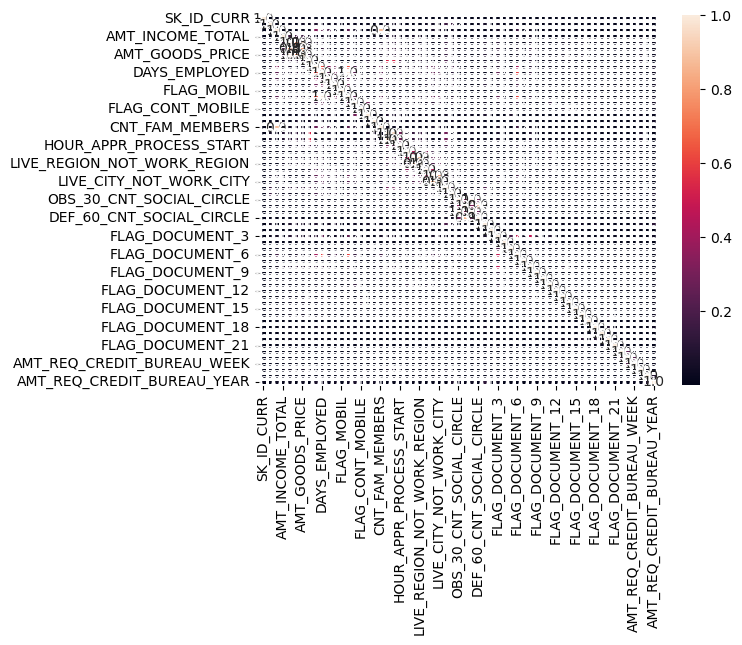

In [59]:
sns.heatmap(abs_corr,annot=True, fmt="2.1f",linewidth=1)
plt.show()

In [60]:
application_df.shape

(307511, 74)

In [61]:
previous_application_df.shape

(1670214, 37)

In [62]:
# merging both application_df and previous_application_df 

merged_df=pd.merge(application_df,previous_application_df,how="outer",on=["SK_ID_CURR"])

In [63]:
merged_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002     1.0           Cash loans           M            N   
1      100003     0.0           Cash loans           F            N   
2      100003     0.0           Cash loans           F            N   
3      100003     0.0           Cash loans           F            N   
4      100004     0.0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y           0.0          202500.0      406597.5   
1               N           0.0          270000.0     1293502.5   
2               N           0.0          270000.0     1293502.5   
3               N           0.0          270000.0     1293502.5   
4               Y           0.0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2        35698.5          1129500.0            Family    State servant   
3        35698.5          1129500.0            Family    State servant   
4         6750.0           135000.0     Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801     -9461.0         -637.0            -3648.0   
1                    0.003541    -16765.0        -1188.0            -1186.0   
2                    0.003541    -16765.0        -1188.0            -1186.0   
3                    0.003541    -16765.0        -1188.0            -1186.0   
4                    0.010032    -19046.0         -225.0            -4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0          -2120.0         1.0             1.0              0.0   
1           -291.0         1.0             1.0              0.0   
2           -291.0         1.0             1.0              0.0   
3           -291.0         1.0             1.0              0.0   
4          -2531.0         1.0             1.0              1.0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0               1.0         1.0         0.0        Laborers              1.0   
1               1.0         1.0         0.0      Core staff              2.0   
2               1.0         1.0         0.0      Core staff              2.0   
3               1.0         1.0         0.0      Core staff              2.0   
4               1.0         1.0         0.0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                   2.0                          2.0   
1                   1.0                          1.0   
2                   1.0                          1.0   
3                   1.0                          1.0   
4                   2.0                          2.0   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                       10.0   
1                       MONDAY                       11.0   
2                       MONDAY                       11.0   
3                       MONDAY                       11.0   
4                       MONDAY                        9.0   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                  

In [64]:
merged_df.shape

(1686668, 110)

In [65]:
merged_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       ...
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', length=110)

In [66]:
100*merged_df.isnull().mean()

SK_ID_CURR                       0.000000
TARGET                          15.208269
NAME_CONTRACT_TYPE_x            15.208269
CODE_GENDER                     15.208269
FLAG_OWN_CAR                    15.208269
FLAG_OWN_REALTY                 15.208269
CNT_CHILDREN                    15.208269
AMT_INCOME_TOTAL                15.208269
AMT_CREDIT_x                    15.208269
AMT_ANNUITY_x                   15.208269
AMT_GOODS_PRICE_x               15.208269
NAME_TYPE_SUITE_x               15.447261
NAME_INCOME_TYPE                15.208269
NAME_EDUCATION_TYPE             15.208269
NAME_FAMILY_STATUS              15.208269
NAME_HOUSING_TYPE               15.208269
REGION_POPULATION_RELATIVE      15.208269
DAYS_BIRTH                      15.208269
DAYS_EMPLOYED                   15.208269
DAYS_REGISTRATION               15.208269
DAYS_ID_PUBLISH                 15.208269
FLAG_MOBIL                      15.208269
FLAG_EMP_PHONE                  15.208269
FLAG_WORK_PHONE                 15

In [67]:
num_cols1=merged_df.describe().columns
num_cols1

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG

In [68]:
cat_col1 = list(set(merged_df.columns) - set(merged_df.describe().columns)) 
cat_col1

['WEEKDAY_APPR_PROCESS_START_x',
 'CHANNEL_TYPE',
 'CODE_GENDER',
 'NAME_HOUSING_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_TYPE_SUITE_y',
 'NAME_CONTRACT_STATUS',
 'ORGANIZATION_TYPE',
 'NAME_PORTFOLIO',
 'FLAG_OWN_REALTY',
 'NAME_YIELD_GROUP',
 'NAME_EDUCATION_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_CONTRACT_TYPE_y',
 'PRODUCT_COMBINATION',
 'Size_Bucket',
 'NAME_PRODUCT_TYPE',
 'NAME_CONTRACT_TYPE_x',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CLIENT_TYPE',
 'WEEKDAY_APPR_PROCESS_START_y',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_FAMILY_STATUS',
 'NAME_PAYMENT_TYPE',
 'NAME_TYPE_SUITE_x',
 'OCCUPATION_TYPE',
 'CODE_REJECT_REASON',
 'NAME_INCOME_TYPE',
 'FLAG_OWN_CAR']

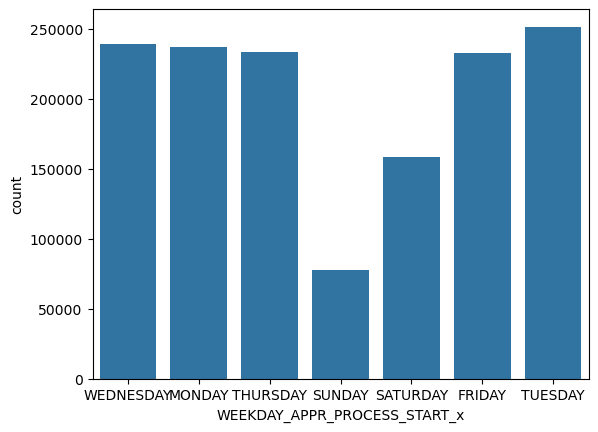

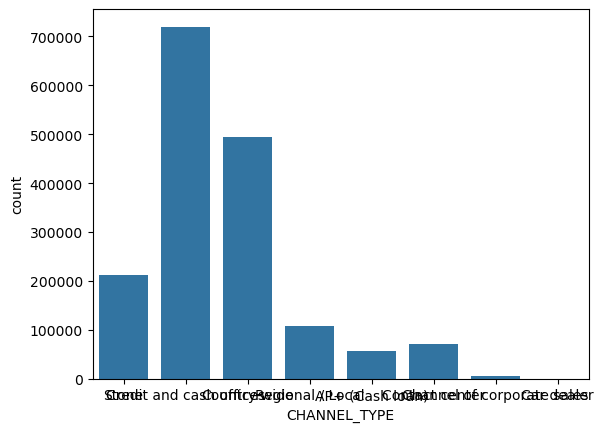

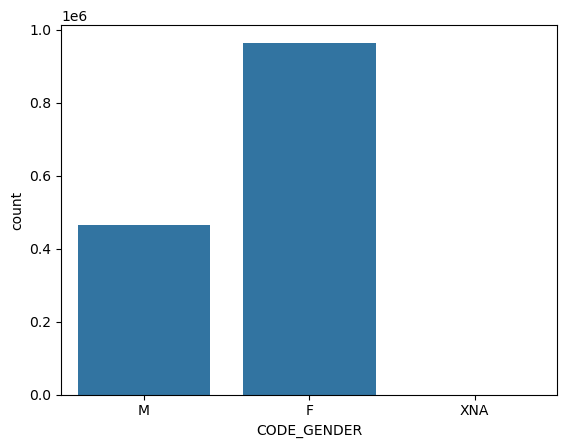

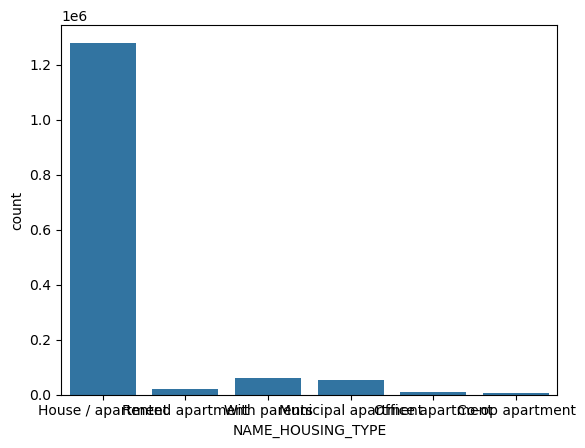

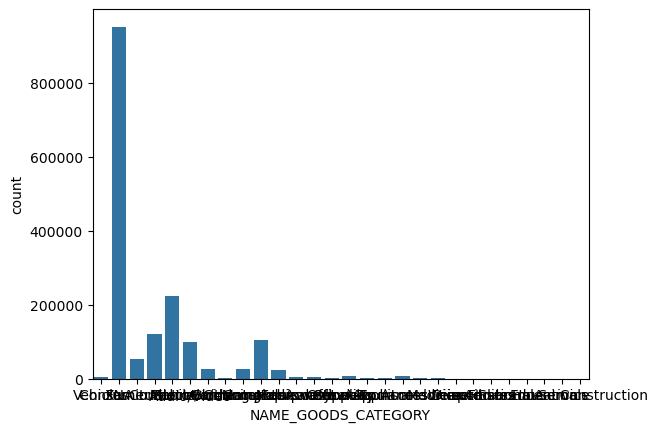

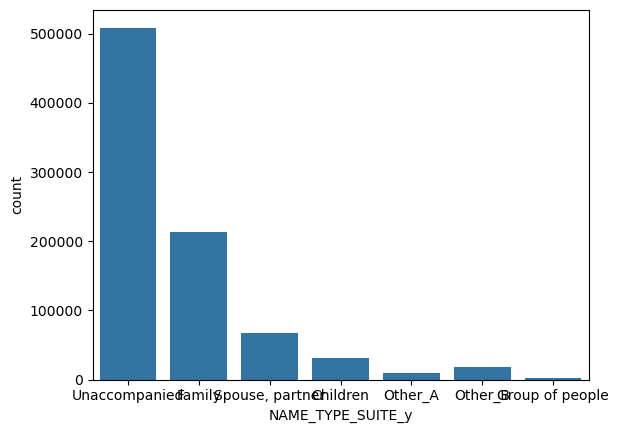

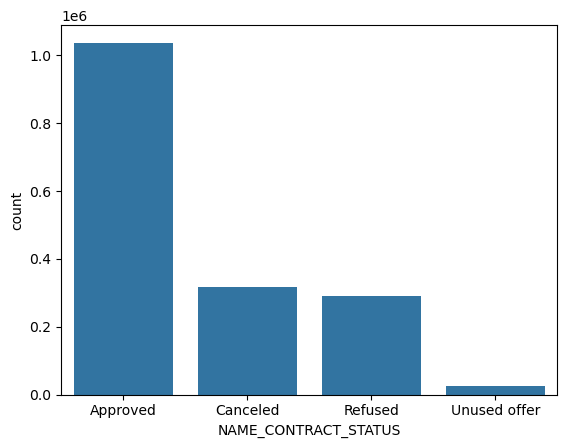

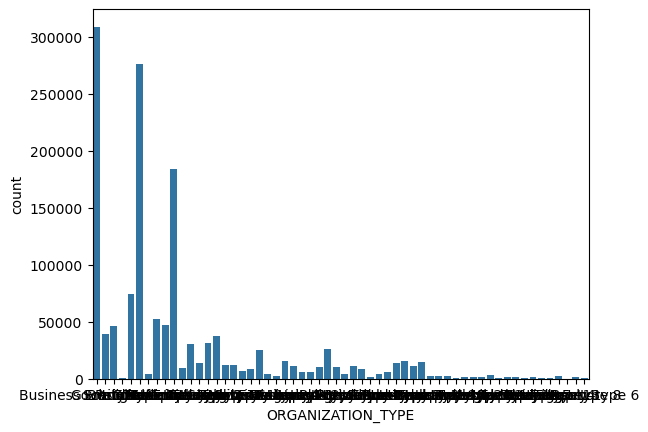

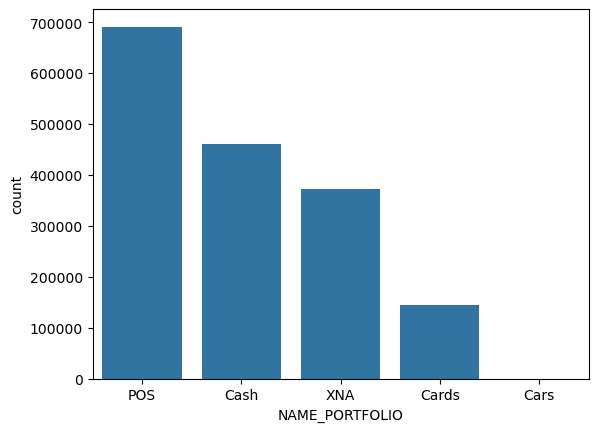

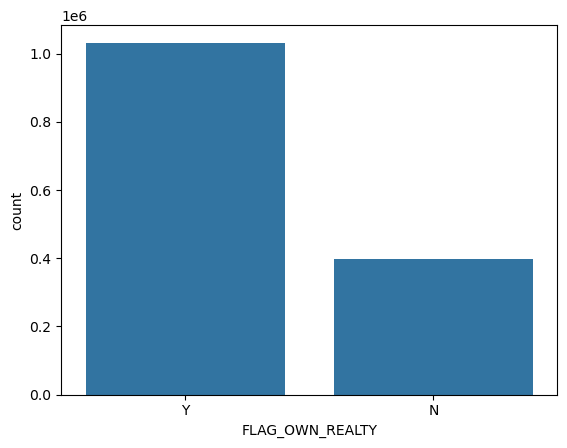

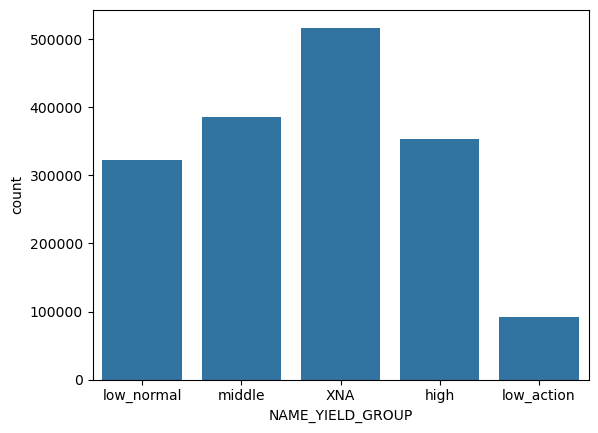

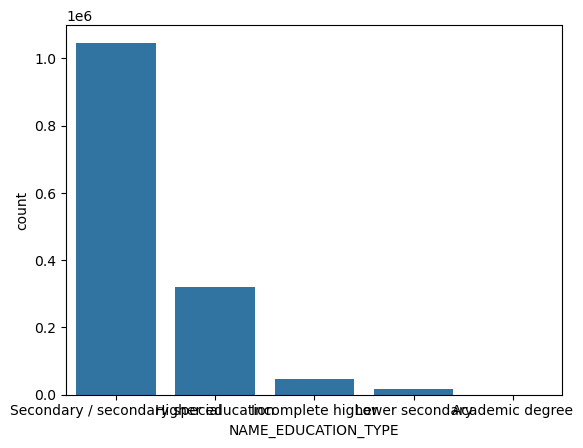

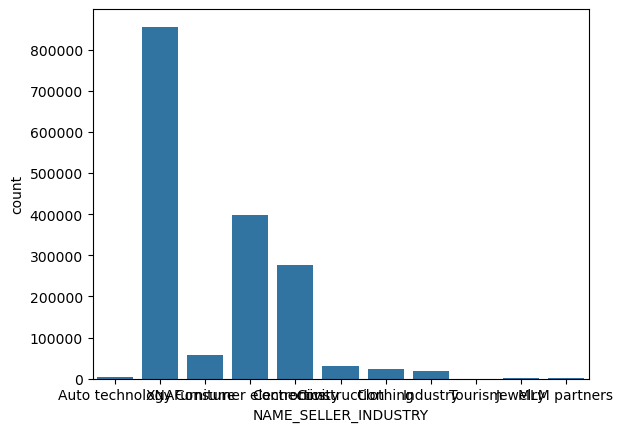

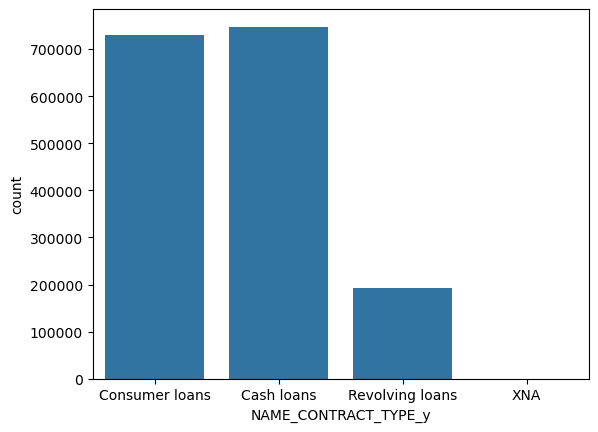

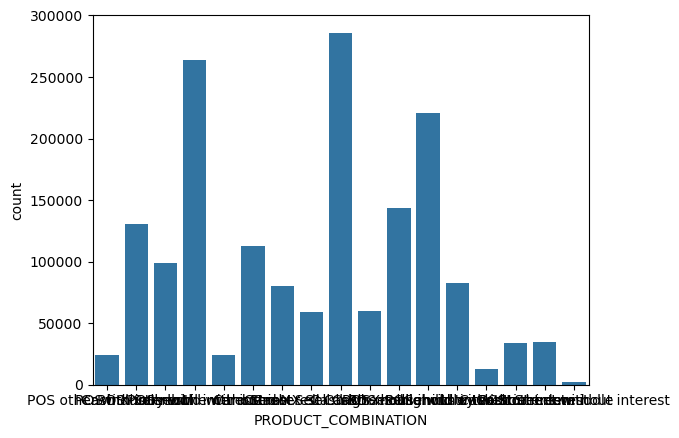

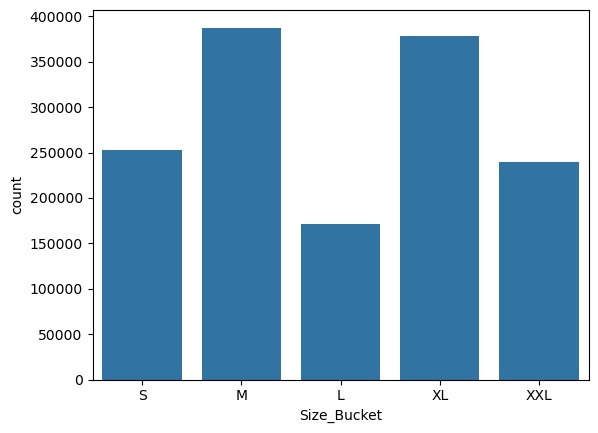

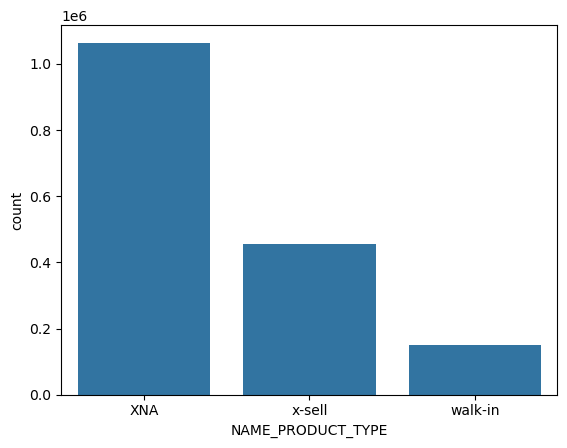

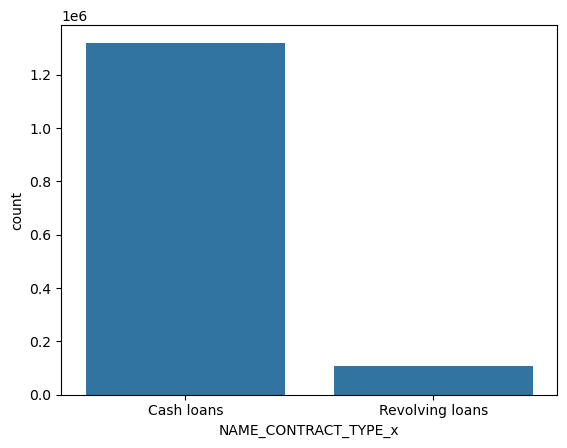

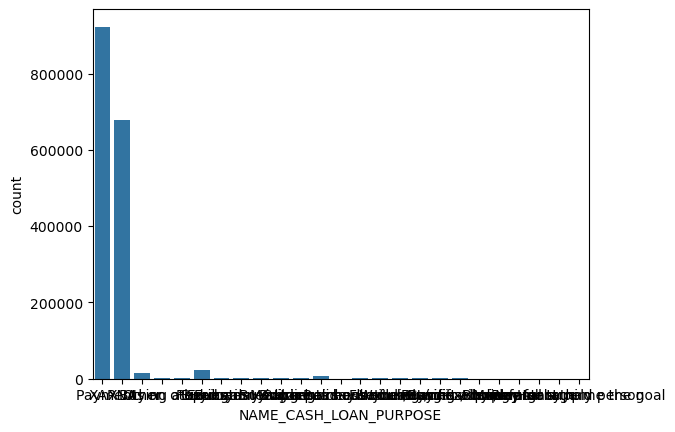

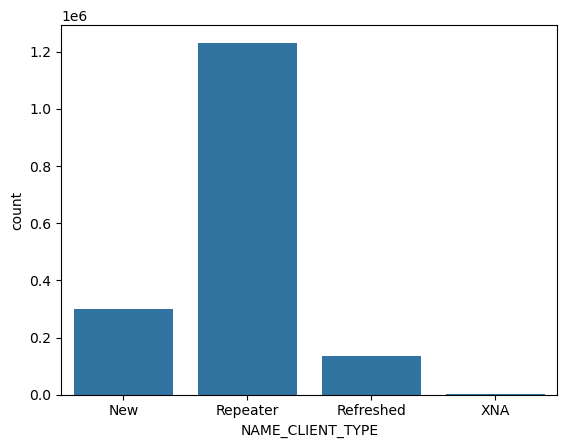

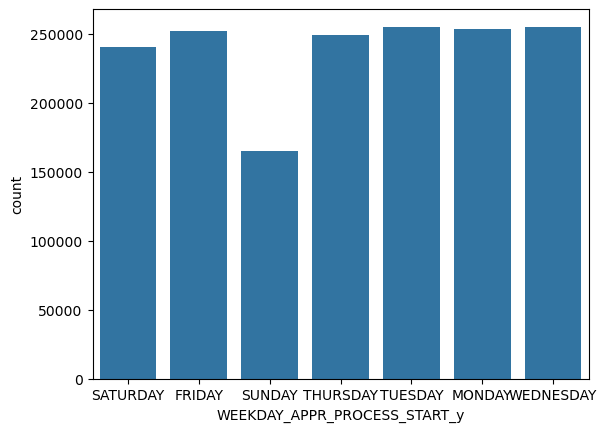

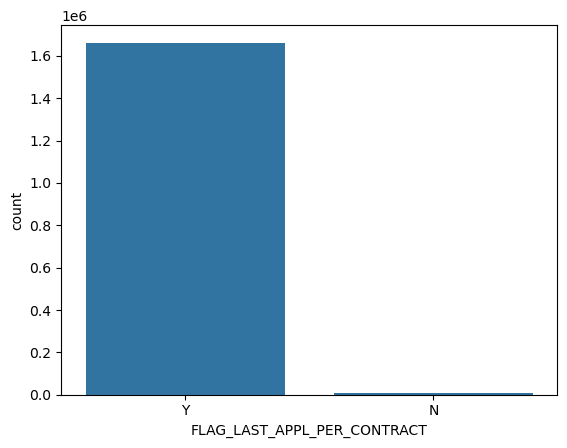

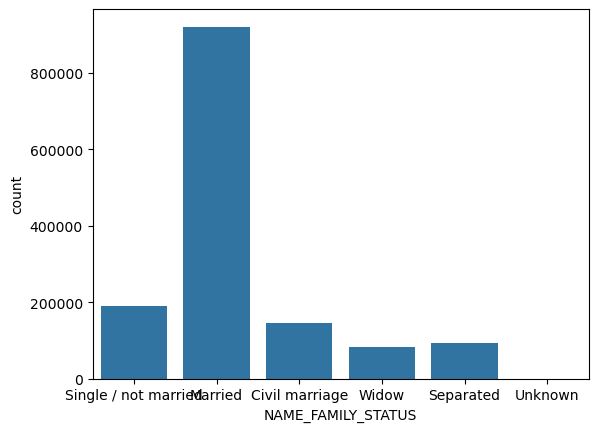

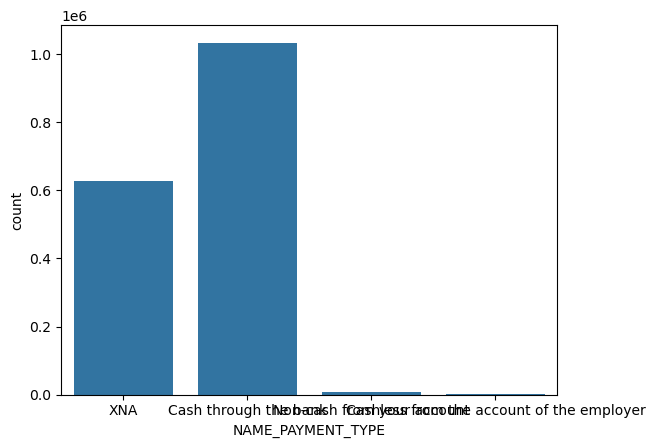

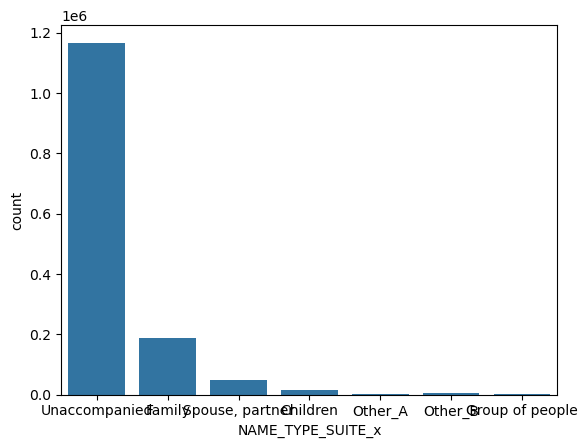

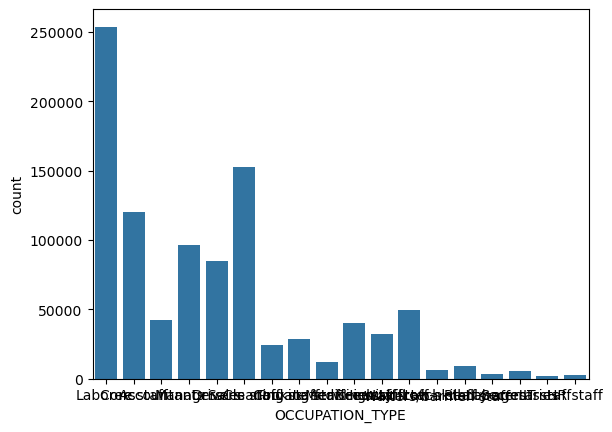

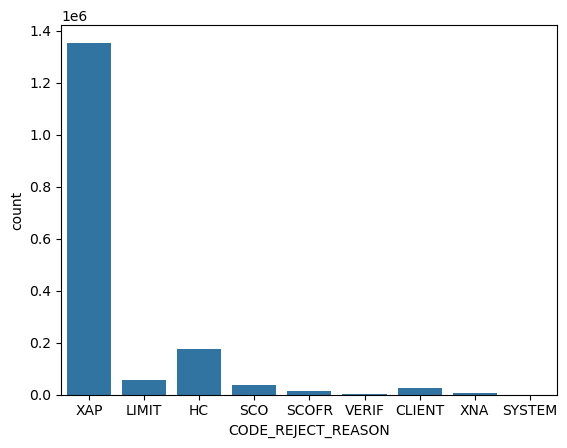

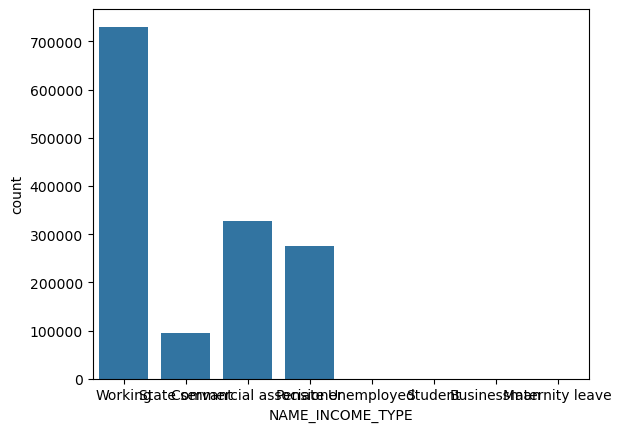

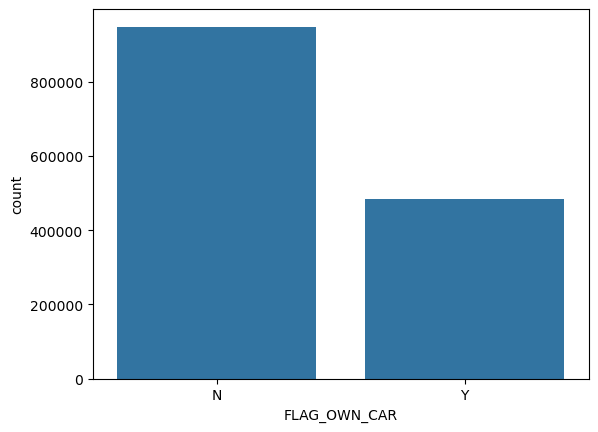

In [69]:
for col in cat_col1:
    sns.countplot(x=merged_df[col])
    plt.show()

In [70]:
# as the dataset is having missing values in majority of the columns, i am taking a cutoff of 45% and dropping those columns

cut_off = 40
cols_to_drop=list(merged_df.columns[100*merged_df.isnull().mean()>cut_off])
print(cols_to_drop)
print("no of columns dropped:",len(cols_to_drop))

['OCCUPATION_TYPE', 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE_y', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']
no of columns dropped: 12


In [71]:
merged_df=merged_df.drop(cols_to_drop,axis=1)

In [72]:
100*merged_df.isnull().mean()

SK_ID_CURR                       0.000000
TARGET                          15.208269
NAME_CONTRACT_TYPE_x            15.208269
CODE_GENDER                     15.208269
FLAG_OWN_CAR                    15.208269
FLAG_OWN_REALTY                 15.208269
CNT_CHILDREN                    15.208269
AMT_INCOME_TOTAL                15.208269
AMT_CREDIT_x                    15.208269
AMT_ANNUITY_x                   15.208269
AMT_GOODS_PRICE_x               15.208269
NAME_TYPE_SUITE_x               15.447261
NAME_INCOME_TYPE                15.208269
NAME_EDUCATION_TYPE             15.208269
NAME_FAMILY_STATUS              15.208269
NAME_HOUSING_TYPE               15.208269
REGION_POPULATION_RELATIVE      15.208269
DAYS_BIRTH                      15.208269
DAYS_EMPLOYED                   15.208269
DAYS_REGISTRATION               15.208269
DAYS_ID_PUBLISH                 15.208269
FLAG_MOBIL                      15.208269
FLAG_EMP_PHONE                  15.208269
FLAG_WORK_PHONE                 15

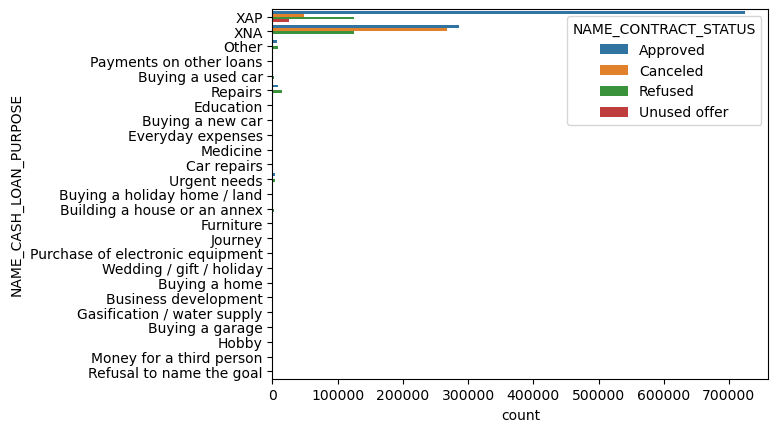

In [73]:
sns.countplot(data=merged_df,y="NAME_CASH_LOAN_PURPOSE",hue="NAME_CONTRACT_STATUS")
plt.show()

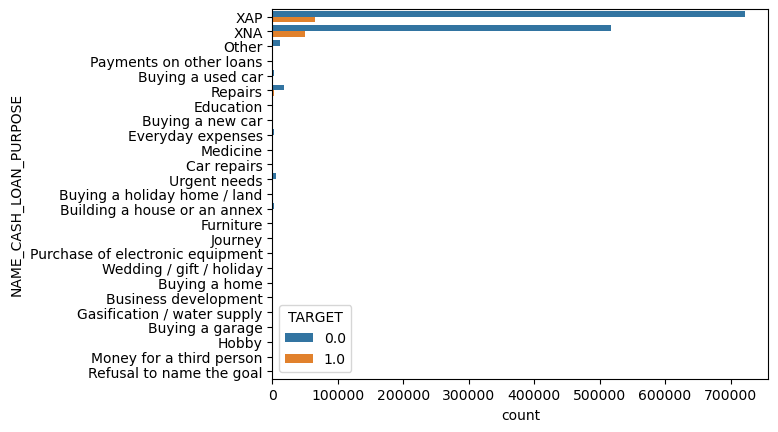

In [74]:
sns.countplot(data=merged_df,y="NAME_CASH_LOAN_PURPOSE",hue="TARGET")
plt.show()

most of the loan rejections are from Repairs